# IMM - Taller 08 (22/10/2024)


---
---
### 3. Ejercicio para entregar: Péndulo amortiguado

De acuerdo con la fisica newtoniana, el movimiento de un [péndulo simple](https://es.wikipedia.org/wiki/P%C3%A9ndulo_simple) tomando en cuenta la fricción del aire  se puede describir a través de la ecuación diferencial

\begin{equation}
\dfrac{d^2 \theta}{d t^2} + b \dfrac{d\theta}{d t} + \dfrac{g}{l}\,\sin\theta  = 0,
\end{equation}

donde $\theta$ (*theta*) representa el ángulo con la vertical, $g$ la acelaración de la gravedad, $l$ la longitud del péndulo y $b$ la intensidad del amortiguamiento debido al aire.



### Problema:

Suponiendo que $l = 2~\text{m}$, $g = 9.8~\text{m/s}^2$ y $b=0.2~\text{s}^{-1}$, y definido una nueva variable $\omega = \dfrac{d\theta}{d t}$, realice las siguientes tareas:

1. Grafique el campo de velocidades de este sistema para $\theta \in [-\pi, \pi]$ y  $\omega \in [-2 \pi, 2 \pi]$.  

2. Del campo de velocidades estime el valor máximo que alcanza $\theta$ si se comienza con la condición inicial  $\theta_0 = \pi/4$ y $\omega_0=0$.

3. Del campo de velocidades estime el valor máximo que alcanza la velocidad angular $\omega$ si se comienza con una condición inicial $\theta_0 = 0$ y $\omega_0 = 5$.

4. Describa el comportamiento que seguirán las variables $x$ y $y$ si la condición inicial es $\left( \theta_0,\, \omega_0\right) = \left( 3,\, -2 \right)$. ¿Cuál será el mínimo valor de $\theta$ que es posible alcanzar partiendo de esa condición inicial?



In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
g = 9.81    # [m/s^2]
l = 2.0     # [m]
b = 0.2     # [1/s]

In [6]:
# Función que devuelve el campo vectorial (dθ/dt, dω/dt)
def pendulum_field(theta, omega):
    dtheta_dt = omega
    domega_dt = -(g/l) * np.sin(theta) - b * omega
    return dtheta_dt, domega_dt

# Crear una malla de valores para theta y omega
theta_vals = np.linspace(-np.pi, np.pi, 20)
omega_vals = np.linspace(-2 * np.pi, 2 * np.pi, 20)
Theta, Omega = np.meshgrid(theta_vals, omega_vals)

# Calcular los vectores de velocidad para cada punto de la malla
dTheta_dt, dOmega_dt = pendulum_field(Theta, Omega)

In [7]:
velocidad_angular_comp_1 = dTheta_dt
velocidad_angular_comp_2 = dOmega_dt
# norma polar:
norma = np.sqrt(velocidad_angular_comp_1**2 + velocidad_angular_comp_2**2)

#normalizar
u1 = velocidad_angular_comp_1/norma
u2 = velocidad_angular_comp_2/norma



In [16]:
# graficar puntos críticos sobre las líneas de campo
# coordenadas de los puntos críticos usando la derivada de la función usando scipy
from scipy.optimize import fsolve

puntos_criticos = []
ecuacion = pendulum_field(0, 0)

for theta_0 in np.linspace(-np.pi, np.pi, 10):
    for omega_0 in np.linspace(-2 * np.pi, 2 * np.pi, 10):
        punto = fsolve(ecuacion, [theta_0, omega_0]) 
        if np.all(np.abs(punto) < 10):
            puntos_criticos.append(punto)
            
puntos_criticos = np.array(puntos_criticos)


TypeError: fsolve() missing 1 required positional argument: 'x0'

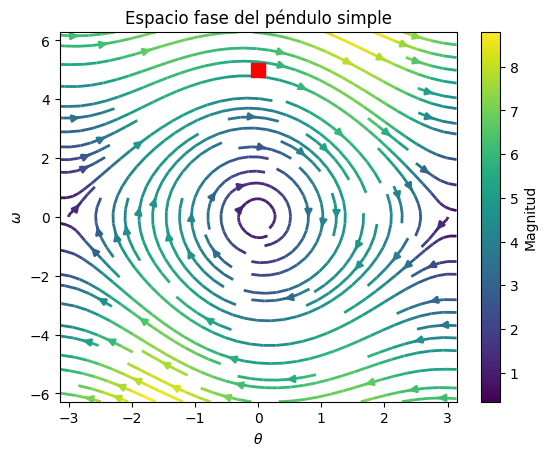

In [8]:
# grafica
plt.streamplot(Theta, Omega, u1, u2, color=norma, linewidth=2)
plt.colorbar(label='Magnitud')
# Etiquetas de los ejes
plt.plot(0, 5, 'sr',markersize=10)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\omega$')
plt.title('Espacio fase del péndulo simple')
plt.show()

## Valor máximo de $\theta$ para $\theta_0 = \pi/4$ y $\omega_0=0$:
El ángulo máximo que alcanza el péndulo depende de la energía inicial y el amortiguamiento. 

In [9]:
from scipy.integrate import solve_ivp

# Definir las ecuaciones del péndulo amortiguado
def pendulum_ode(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -(g/l) * np.sin(theta) - b * omega
    return [dtheta_dt, domega_dt]

# Condiciones iniciales
theta0 = np.pi / 4
omega0 = 0.0
y0 = [theta0, omega0]

# Tiempo de simulación
t_span = [0, 20]  # Segundos
t_eval = np.linspace(0, 20, 500)

# Resolver el sistema de ecuaciones
sol = solve_ivp(pendulum_ode, t_span, y0, t_eval=t_eval)

# Estimar el valor máximo de theta
theta_max = np.max(sol.y[0])

# metodo euler
def euler(ode, y0, t_span, h):
    t0, tf = t_span
    t = np.arange(t0, tf, h)
    y = np.zeros((len(y0), len(t)))
    y[:, 0] = y0
    for i in range(1, len(t)):
        y[:, i] = y[:, i-1] + h * np.array(ode(t[i-1], y[:, i-1]))
    return t, y

print('El valor máximo de theta segundo el método de Euler es:', euler(pendulum_ode, y0, t_span, 0.01)[1][0].max())
print('El valor máximo de theta segundo el método de solve_ivp es:', theta_max)


El valor máximo de theta segundo el método de Euler es: 0.7853981633974483
El valor máximo de theta segundo el método de solve_ivp es: 0.7853981633974483


## Valor máximo de $\omega$ para $\theta_0 = 0$ y $\omega_0 = 5$:

In [11]:
# Parámetros del sistema
theta0 = 0.0  # Condición inicial de theta
omega0 = 5.0  # Condición inicial de omega
dt = 0.01  # Tamaño de paso
t_final = 10  # Tiempo final de la simulación
num_steps = int(t_final / dt)

# Inicializar arrays para almacenar los resultados
theta_vals = np.zeros(num_steps)
omega_vals = np.zeros(num_steps)
time_vals = np.linspace(0, t_final, num_steps)

# Condiciones iniciales
theta_vals[0] = theta0
omega_vals[0] = omega0

# Método de Euler para aproximar la solución y hallar el maximo de theta
for i in range(1, num_steps):
    dtheta_dt, domega_dt = pendulum_field(theta_vals[i-1], omega_vals[i-1])
    theta_vals[i] = theta_vals[i-1] + dt * dtheta_dt
    omega_vals[i] = omega_vals[i-1] + dt * domega_dt
    
print('El valor máximo de theta segundo el método de Euler es:', theta_vals.max())

El valor máximo de theta segundo el método de Euler es: 8.451123607555303


## Puntos 4 y 5